In [34]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'1.15.5'

In [35]:
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(29, activation='softmax'))
model.load_weights('../models/kaggle_Adam/model.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 61, 61, 64)        3136      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 64)        65600     
_________________________________________________________________
dropout_10 (Dropout)         (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 26, 26, 128)       131200    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 128)       262272    
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 9, 9, 256)         524544    
__________

In [41]:
model = tf.keras.models.load_model('../models/kaggle_Adamax/model.h5', compile=False)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 61, 61, 64)        3136      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        65600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       131200    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       262272    
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 256)        

In [91]:
encoding = np.array([
  'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'
])

array([10,  1, 21,  0, 11, 15, 23, 13, 25,  3, 27, 18,  7,  2, 28,  6, 14,
        2,  4,  5,  0, 16, 12, 20, 22,  9,  3,  1, 19,  8, 17, 24])

In [126]:
    
from keras.preprocessing.image import ImageDataGenerator
data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True)
train_generator = data_augmentor.flow_from_directory('../datasets/asl_alphabet_train/asl_alphabet_train',
    target_size=(64, 64), batch_size=32, shuffle=False)

Found 87000 images belonging to 29 classes.


In [101]:
for d, a,b  in os.walk('../demo/public/asl_alphabet_test'):
    files = filter(lambda f: f.endswith('g'), b) # jpg
    filenames = np.array(list(files))
    paths = np.array([os.path.join(d, f) for f in filenames])
    classes = pd.Series(filenames)\
        .str.extract(r'(?P<class>.*)_.*')['class']
    labels = classes\
        .map(lambda lbl: np.argwhere(encoding == lbl)[0][0])
    df = pd.DataFrame({
        'paths':paths,
        'filenames':filenames,
        'paths':paths,
        'classes':classes,
        'labels':labels
    })
    break
labels.values, classes.values

,paths,filenames,classes,labels
0,../demo/public/asl_alphabet_test/K_test.jpg,K_test.jpg,K,10
1,../demo/public/asl_alphabet_test/B_test.jpg,B_test.jpg,B,1
2,../demo/public/asl_alphabet_test/V_test.jpg,V_test.jpg,V,21
3,../demo/public/asl_alphabet_test/A_1.jpg,A_1.jpg,A,0
4,../demo/public/asl_alphabet_test/L_test.jpg,L_test.jpg,L,11
5,../demo/public/asl_alphabet_test/P_test.jpg,P_test.jpg,P,15
6,../demo/public/asl_alphabet_test/X_test.jpg,X_test.jpg,X,23
7,../demo/public/asl_alphabet_test/N_test.jpg,N_test.jpg,N,13
8,../demo/public/asl_alphabet_test/Z_test.jpg,Z_test.jpg,Z,25
9,../demo/public/asl_alphabet_test/D_1.jpg,D_1.jpg,D,3


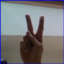

In [102]:
from IPython.display import Image 
imgs = [tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode='rgb', target_size=(64, 64),
    interpolation='bilinear'
) for path in paths]
display(imgs[0])

In [103]:
imarrs = np.array([tf.keras.preprocessing.image.img_to_array(img) for img in imgs])
imarrs.shape

(32, 64, 64, 3)

In [134]:
x=data_augmentor.standardize(imarrs)
x = tf.convert_to_tensor(x)
x

<tf.Tensor 'Const_7:0' shape=(32, 64, 64, 3) dtype=float32>

(array([30609., 41765., 35620., 42232., 50240., 62493., 70352., 50770.,
         6359.,  2776.]),
 array([  3. ,  28.2,  53.4,  78.6, 103.8, 129. , 154.2, 179.4, 204.6,
        229.8, 255. ], dtype=float32),
 <BarContainer object of 10 artists>)

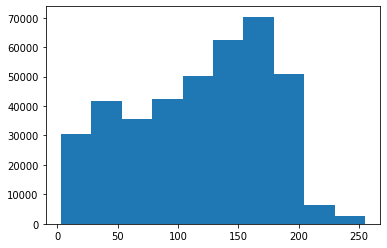

In [104]:
plt.hist(imarrs.flatten())

In [132]:
x = tf.convert_to_tensor(imarrs)
# x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x

<tf.Tensor 'Const_5:0' shape=(32, 64, 64, 3) dtype=float32>

In [109]:
# plt.hist(x.numpy().flatten())

A random batch

In [110]:
x1 = tf.random.uniform((32, 64, 64, 3))
model.predict(x1, steps=1)[0]

array([3.7190875e-19, 2.0699164e-23, 2.8730776e-26, 2.4897717e-27,
       7.9088727e-23, 3.1155714e-32, 1.9934511e-18, 8.0536604e-18,
       1.2185931e-22, 2.7953375e-25, 1.0980109e-26, 4.6250824e-30,
       4.3568547e-26, 1.5346510e-22, 1.9455815e-24, 8.0520772e-22,
       9.0491540e-22, 1.7026111e-20, 3.0608886e-16, 1.8415627e-23,
       2.0155003e-21, 6.7009268e-20, 6.0485846e-29, 1.9674224e-21,
       1.0291352e-19, 7.1339158e-20, 2.0008579e-24, 1.0000000e+00,
       2.2658684e-24], dtype=float32)

Input images

In [135]:
predictions = model.predict(x, steps=1)
predictions[0]

array([2.7634277e-30, 1.5734985e-28, 0.0000000e+00, 0.0000000e+00,
       5.9156937e-34, 0.0000000e+00, 2.5828823e-30, 1.0367585e-29,
       2.8903503e-24, 1.9649793e-34, 1.0000000e+00, 2.7121168e-24,
       7.7822465e-16, 1.0304392e-27, 1.6023486e-29, 0.0000000e+00,
       0.0000000e+00, 1.0630703e-22, 0.0000000e+00, 4.3028642e-32,
       9.9459221e-27, 3.7305762e-15, 5.6080079e-26, 3.1821326e-36,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00], dtype=float32)

In [112]:
np.sum(predictions[0])

1.0

In [136]:
intlabels_p = np.argmax(predictions, axis=1)
intlabels_p

array([10,  1, 21,  0, 11, 15, 23, 13, 25,  3, 27, 18,  7,  2, 28,  6, 14,
        2,  4,  5,  0, 16, 12, 20, 22,  9,  3,  1, 19,  8, 17, 24])

In [120]:
df['labels'].values

array([10,  1, 21,  0, 11, 15, 23, 13, 25,  3, 27, 18,  7,  2, 28,  6, 14,
        2,  4,  5,  0, 16, 12, 20, 22,  9,  3,  1, 19,  8, 17, 24])

In [52]:
sum(intlabels_p == intlabels), 'out of', 32

(1, 'out of', 32)